River Kelly

CSCI 347

Homework 05

Show your work. Include any code snippets you used to generate an answer, using comments
in the code to clearly indicate which problem corresponds to which code

In [2]:
import math
import pandas as pd
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. (2 points)

In Python, generate a (2-dimensional multivariate Gaussian) data matrix $D$ using the following code:

In [3]:
mu = np.array([0,0])
Sigma = np.array([[1,0], [0, 1]])
X1, X2 = np.random.multivariate_normal(mu, Sigma, 1000).T
D = np.array([X1, X2]).T

Create a scatter plot of the data, with the x-axis corresponding to the first attribute (column)
in D, and the y-axis corresponding to the second attribute (column) in D.

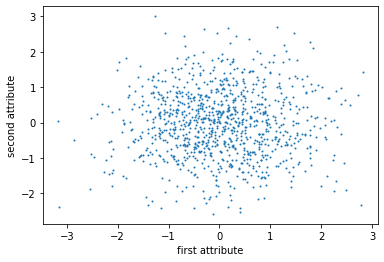

In [4]:
plt.scatter(x=D[:,0], y=D[:,1], s=1)
plt.xlabel('first attribute')
plt.ylabel('second attribute')
plt.show()

# 2. (7 points)

Using the scaling matrix $S$ and rotation matrix $R$ below to transform the data $D$
from Question 1, by multiplying each data instance (row) $x_i$ by $RS$. Let $D_{RS}$ be the matrix of
the transformed data. That is, each 2-dimensional row vector $x_i$ in $D$ should be transformed
into a 2-dimensional vector $RSx_i$ in $D_{RS}$.

In [5]:
R = np.ndarray(shape=(2,2))
R[0] = [ math.cos( math.pi / 4 ), - math.sin( math.pi / 4) ]
R[1] = [ math.sin( math.pi / 4 ), math.cos( math.pi / 4) ]

S = np.ndarray(shape=(2,2))
S[0] = [5, 0]
S[1] = [0, 2]

In [6]:
D_RS = np.ndarray(shape=D.shape)
for index, row in enumerate(D):
    new_row = np.dot(row, R)
    new_row = np.dot(new_row, S)
    D_RS[index] = new_row

## a (4 points)

Plot the transformed data $D_{RS}$ in the same figure as the original data $D$,
using different colors to differentiate between the original and transformed data.

$$
R =\begin{pmatrix}
  \cos(\pi / 4) & - \sin(\pi/4) \\ 
  \sin(\pi / 4) & \cos(\pi /4) 
\end{pmatrix} , 
S =\begin{pmatrix}
  5 & 0 \\
  0 & 2
\end{pmatrix}
$$

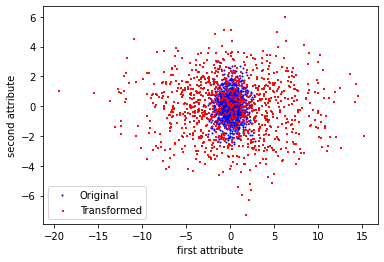

In [7]:
plt.scatter(x=D[:,0], y=D[:,1], color='blue', marker='o', s=1)
plt.scatter(x=D_RS[:,0], y=D_RS[:,1], color='red', marker='s', s=1)
plt.xlabel('first attribute')
plt.ylabel('second attribute')
plt.legend(['Original', 'Transformed'])
plt.show()

## b (2 points)

Write down the covariance matrix of the transformed data $D_{RS}$.

In [8]:
def covariance(v1, v2 = None):
    if v2 is None: v2 = v1
    # vector 1 mean
    v1_mean = v1.mean()
    # vector 2 mean
    v2_mean = v2.mean()
    # co_var (the covariance between v1 and v2)
    co_var = 0
    # loop through v1 and v2 values
    for i in range(v1.shape[0]):
        co_var += (v1[i] - v1_mean) * (v2[i] - v2_mean)
    # calculate and return the co-variance between v1 and v2
    return (co_var / (v1.shape[0] - 1))

def covarianceMatrix(m):
    # co-variance matrix
    covar_m = np.ndarray((m.shape[1], m.shape[1]))
    # loop through input matrix rows
    for i in range(m.shape[1]):
        # loop through input matrix rows (again)
        for j in range(m.shape[1]):
            # set x_ij covariance value
            covar_m[i, j] = covariance(m[:,i], m[:,j])
    # return the covariance matrix
    return covar_m
covarianceMatrix(D_RS)

array([[24.19674662, -0.35095176],
       [-0.35095176,  3.75775305]])

## c (1 point)

What is the total variance of the transformed data $D_{RS}$.

In [9]:
total_var = 0
for col_index in range(D_RS.shape[1]):
    total_var += covariance(D_RS[:,col_index])
total_var

27.954499661950738

In [10]:
# Double check our answer
total_var = 0
for col_index in range(D_RS.shape[1]):
    total_var += np.var(D_RS[:,col_index], ddof=1)
total_var

27.954499661950724

# 3. (8 points)

Use sklearn’s PCA function to transform the data matrix $D_{RS}$ from Question 2 to
a 2-dimensional space where the coordinate axes are the principal components.

In [11]:
pca = PCA(n_components=2)
pca_transformed_D = pca.fit_transform(D_RS)

## a (4 points)

Plot the PCA-transformed data, with the $x$-axis corresponding to the first
principal component and the $y$-axis corresponding to the second principal component.

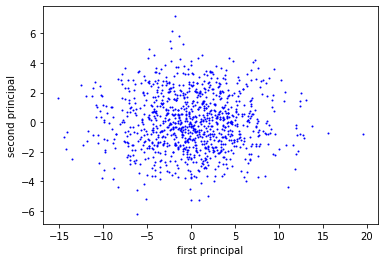

In [12]:
plt.scatter(x=pca_transformed_D[:,0], y=pca_transformed_D[:,1], color='blue', marker='o', s=1)
plt.xlabel('first principal')
plt.ylabel('second principal')
plt.show()

## b (2 points)

What is the estimated covariance matrix of the PCA-transformed data?

In [13]:
covarianceMatrix(pca_transformed_D)

array([[ 2.42027709e+01, -1.29359319e-16],
       [-1.29359319e-16,  3.75172874e+00]])

## c (2 points)

What is the fraction of the total variance captured in the direction of the first principal component?

In [14]:
pca.explained_variance_ratio_[0]

0.8657915977097925

What is the fraction of the total variance captured in the direction of the second principal component?

In [15]:
pca.explained_variance_ratio_[1]

0.13420840229020747

# 4 (18 points)

Load the Boston data set into Python using sklearn’s datasets package. Use
sklearn’s PCA function to reduce the dimensionality of the data to 2 dimensions.

In [ ]:
from sklearn.datasets import load_boston
D_boston = load_boston()['data']

In [17]:
pca = PCA(n_components=2)
pca_transformed_D_boston = pca.fit_transform(D_boston)

## a (5 points)

First, standard-normalize the data. Then, create a scatter plot of the 2-dimensional, PCA-transformed normalized Boston data, with the $x$-axis corresponding
to the first principal component and the $y$-axis corresponding to the second principal
component.

In [18]:
def zScoreNormalize(m):
    # create normlized matrix based on shape of input matrix
    z_score = np.ndarray(m.shape)
    # loop through input matrix rows
    for row_index in range(m.shape[0]):
        # loop through input matrix columns
        for col_index in range(m.shape[1]):
            # get current column array
            col_arr = m[:,col_index]
            # calculate the standard devieation for the current column
            col_std_div = (covariance(col_arr)) ** (1/2)
            # calculate the column's mean
            col_mean = col_arr.mean()
            # get the x_ij value from the imput matix
            x_ij = m[row_index, col_index]
            # calculate the x_ji z-score
            x_ij_zscore = (x_ij - col_mean) / col_std_div
            # set x_ij normalized value in normalized matrix
            z_score[row_index, col_index] = x_ij_zscore
    # return the normalized array
    return z_score

In [19]:
pca_transformed_D_boston_normalized = zScoreNormalize(pca_transformed_D_boston)

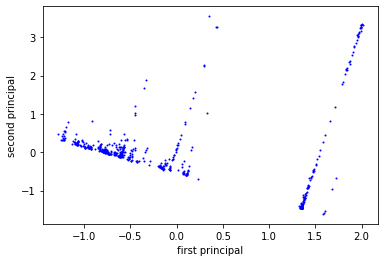

In [20]:
plt.scatter(x=pca_transformed_D_boston_normalized[:,0], y=pca_transformed_D_boston_normalized[:,1], color='blue', marker='o', s=1)
plt.xlabel('first principal')
plt.ylabel('second principal')
plt.show()

## b (3 points)

Create a plot of the fraction of the total variance explained by the first $r$
components for $r = 1, 2, \ldots , 13$.

In [28]:
Sigma = np.cov(pca_transformed_D_boston_normalized, ddof=1)
evalues, evectors = LA.eig(Sigma)

# sort
idx = evalues.argsort()[::-1]
evalues = evalues[idx]
evectors = evectors[:, idx]

eval_sum = evalues.sum()

points = []
for i in range(13):
    p = evalues[i] / eval_sum
    if i > 0:
        p += points[i - 1]
    points.append(p)
points

[(1.0000000000000002-1.191101861843607e-32j),
 (1.0000000000000002-1.191101861843607e-32j),
 (1.0000000000000002+2.6050912849816206e-18j),
 (1.0000000000000002-1.1940765655200862e-32j),
 (1.0000000000000002+7.655940707112978e-18j),
 (1.0000000000000002-1.232595164407831e-32j),
 (1.0000000000000002+1.2709476671181749e-17j),
 (1.0000000000000002-1.232595164407831e-32j),
 (1.0000000000000002+1.0326060872538778e-17j),
 (1.0000000000000002-1.232595164407831e-32j),
 (1.0000000000000002+1.726352338728574e-17j),
 (1.0000000000000002-1.232595164407831e-32j),
 (1.0000000000000002-1.232595164407831e-32j)]

## c (2 points)

### i. (1 point) 

If we want to capture at least $90\%$ of the variance of the normalized Boston
data, how many principal components (i.e., what dimensionality) should we use?

### ii. (1 point)

If we use two principal components of the normalized Boston data, how
much (what fraction or percentage) of the total variance do we capture?

## d (4 points)

Use scikit-learn’s implementation of $k$-means to find 2 clusters in the two-dimensional, PCA-transformed normalized Boston data set (the input to k-means should
be the data that was plotted in part 4e). Plot the 2-dimensional data with colors
corresponding to predicted cluster membership for each point. On the same plot, also
plot the two means found by the $k$-means algorithm in a different color than the colors
used for the data.

In [22]:
from sklearn.cluster import KMeans

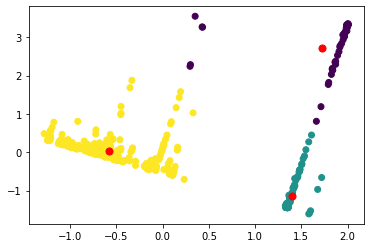

In [23]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(pca_transformed_D_boston_normalized)
centers = kmeans.cluster_centers_

plt.scatter(pca_transformed_D_boston_normalized[:,0], pca_transformed_D_boston_normalized[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')
plt.show()

## e (4 points)

Use scikit-learn’s implementation of DBSCAN to find clusters in the two-dimensional, PCA-transformed normalized Boston data set (the input to DBSCAN
should be the data that was plotted in part ). Plot the 2-dimensional data with colors
corresponding to predicted cluster membership for each point. Noise points should be
colored differently than any of the clusters. How many clusters were found by DBSCAN?

In [24]:
from sklearn.cluster import DBSCAN

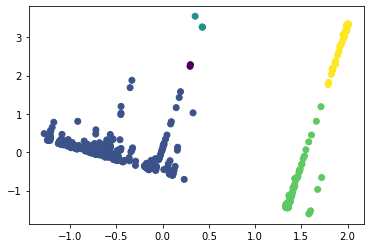

In [25]:
dbs = DBSCAN(eps=.5, min_samples=3)
pred_labels = dbs.fit_predict(pca_transformed_D_boston_normalized)

plt.scatter(pca_transformed_D_boston_normalized[:,0], pca_transformed_D_boston_normalized[:,1], c=pred_labels)
# plt.scatter(centers[:,0], centers[:,1], s=50, c='red')
plt.show()

**Acknowledgements**: Homework problems adapted from assignments of Veronika Strnadova-Neeley.